In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('C:\\Users\\97150\\OneDrive\\Desktop\\personal\\UDEMY\\FuelConsumptionCo2.csv')

In [4]:
df.head(8)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255


In [7]:
df.corr()['CO2EMISSIONS'].sort_values()

FUELCONSUMPTION_COMB_MPG   -0.906394
CYLINDERS                   0.849685
FUELCONSUMPTION_HWY         0.861748
ENGINESIZE                  0.874154
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_CITY        0.898039
CO2EMISSIONS                1.000000
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [9]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

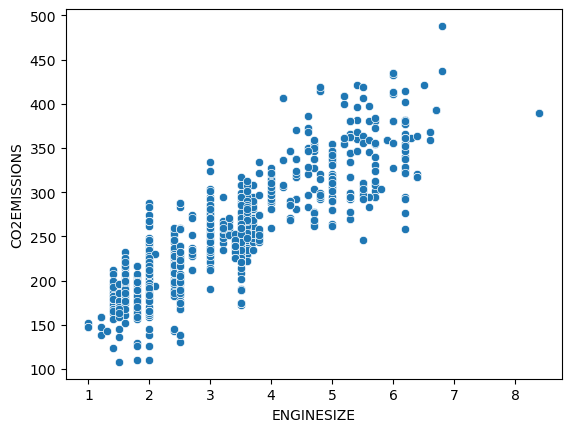

In [10]:
sns.scatterplot(data=cdf,x='ENGINESIZE',y='CO2EMISSIONS')

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

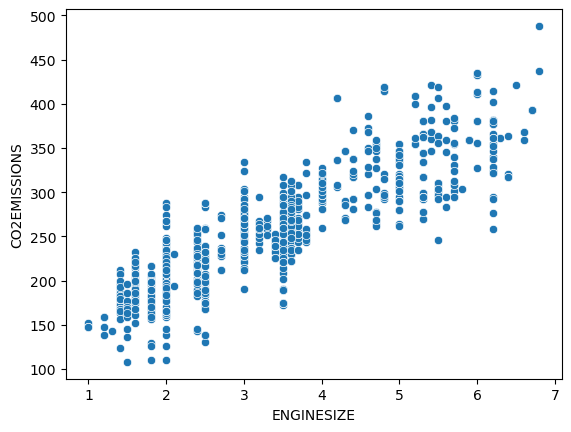

In [238]:
sns.scatterplot(data=cdf,x='ENGINESIZE',y='CO2EMISSIONS')

In [239]:
X=cdf.drop('CO2EMISSIONS',axis=1)

In [240]:
y=cdf['CO2EMISSIONS']

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [1]:
# Using linear Regression model

In [244]:
model.fit(X_train,y_train)

LinearRegression()

In [243]:
model=LinearRegression()

In [245]:
y_pred=model.predict(X_test)

In [246]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [247]:
mean_absolute_error(y_test,y_pred)

16.346418860762093

In [248]:
mean_squared_error(y_test,y_pred)

487.6937517712778

In [249]:
np.sqrt(mean_squared_error(y_test,y_pred))

22.083789343572306

In [ ]:
# Trying to improve the model using ridge regularisation and elastic net

In [250]:
from sklearn.linear_model import RidgeCV

In [251]:
ridge_model=RidgeCV(alphas=(.1,1,5,10),cv=100)

In [252]:
ridge_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. ,  5. , 10. ]), cv=100)

In [253]:
ridge_pred=ridge_model.predict(X_test)

In [254]:
mean_absolute_error(y_test,ridge_pred)

16.35770875566745

In [255]:
mean_squared_error(y_test,ridge_pred)

488.2109477925303

In [256]:
np.sqrt(mean_squared_error(y_test,ridge_pred))

22.095496097452312

In [257]:
ridge_model.alpha_

10.0

In [81]:
from sklearn.linear_model import ElasticNetCV

In [82]:
elastic_model=ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],eps=.001,n_alphas=100,max_iter=1000000)

In [83]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [84]:
elastic_pred=elastic_model.predict(X_test)

In [85]:
mean_absolute_error(y_test,elastic_pred)

16.39583529693878

In [86]:
mean_squared_error(y_test,elastic_pred)

485.55118216173827

In [87]:
np.sqrt(mean_squared_error(y_test,elastic_pred))

22.03522593852258

In [2]:
# # Using suppirt vector regressor 
from sklearn.svm import SVR

In [3]:
svm_model=SVR(C=5000,kernel='rbf')

In [ ]:
svm_model.fit(X_train,y_train)

In [261]:
svm_pred=svm_model.predict(X_test)

In [262]:
mean_absolute_error(y_test,svm_pred)

4.672283265352791

In [263]:
mean_squared_error(y_test,svm_pred)

185.49734015950943

In [264]:
np.sqrt(mean_squared_error(y_test,svm_pred))

13.619740825709917

In [265]:
# Using Gradien tBoosting Regressor and after removing outliers
from sklearn.ensemble import GradientBoostingRegressor

In [266]:
gb_model=GradientBoostingRegressor(n_estimators=300,max_depth=3)

In [267]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=300)

In [268]:
gb_pred=gb_model.predict(X_test)

In [269]:
mean_absolute_error(y_test,gb_pred)

4.067794819183242

In [270]:
mean_squared_error(y_test,gb_pred)

71.78809499242438

In [271]:
np.sqrt(mean_squared_error(y_test,gb_pred))

8.4727855509522